In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data=pd.read_csv("C:/Users/CVR/Downloads/GlobalLandTemperaturesByCity.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


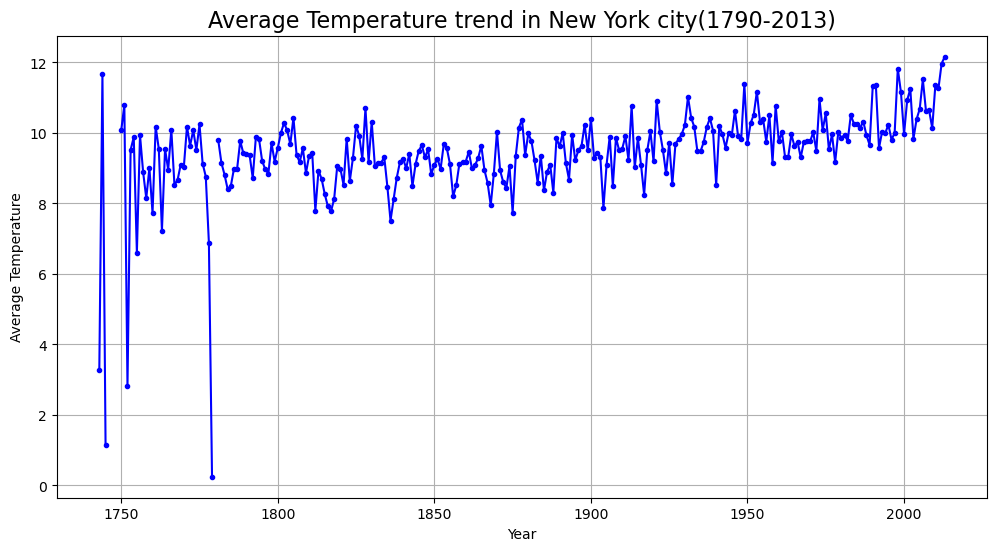

In [23]:
city_data=data[data['City']=='New York'].copy()
city_data['dt']=pd.to_datetime(city_data['dt'],errors='coerce')
city_data['Year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],linestyle='-',color='blue',marker='.')
plt.title("Average Temperature trend in New York city(1790-2013)",fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

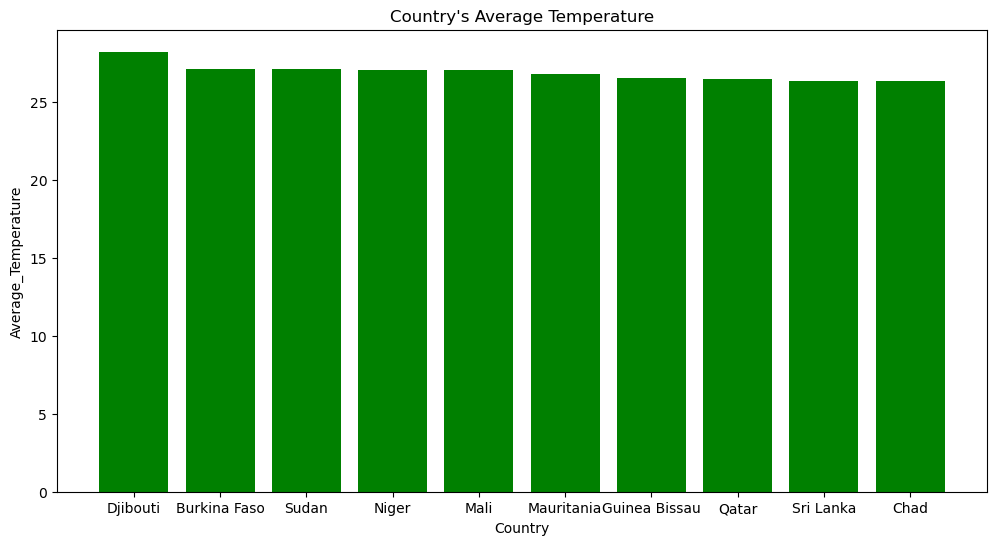

In [40]:
country_avg_temp=data.groupby('Country')['AverageTemperature'].mean().reset_index()
country_avg_temp=country_avg_temp.dropna()
top_countries=country_avg_temp.sort_values(by='AverageTemperature',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_countries['Country'],top_countries['AverageTemperature'],color='green')
plt.title("Country's Average Temperature")
plt.xlabel("Country")
plt.ylabel("Average_Temperature")
plt.xticks(rotation=0)
plt.show()

In [45]:
data['AverageTemperature'].dropna()

0           6.068
5           5.788
6          10.644
7          14.051
8          16.082
            ...  
8599206     7.710
8599207    11.464
8599208    15.043
8599209    18.775
8599210    18.025
Name: AverageTemperature, Length: 8235082, dtype: float64

In [44]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


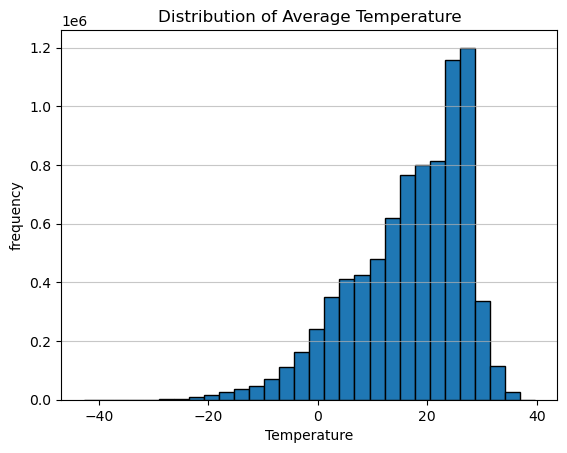

In [59]:
plt.hist(data['AverageTemperature'].dropna(),bins=30,edgecolor='black')
plt.title("Distribution of Average Temperature")
plt.xlabel("Temperature")
plt.ylabel("frequency")
plt.grid(axis=('y'),linestyle='-',alpha=0.7)
plt.show()

In [60]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


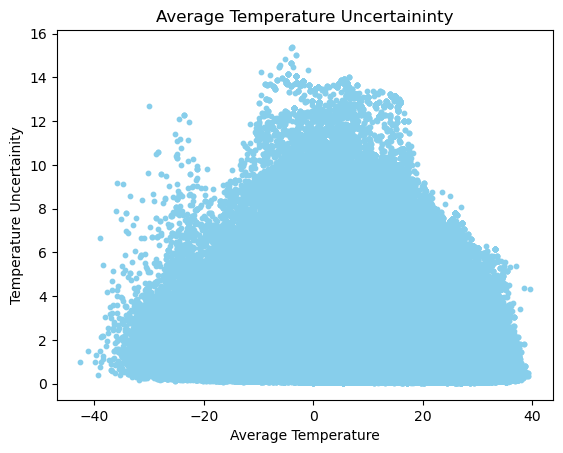

In [69]:
avg_temp=data['AverageTemperature'].dropna()
temp_uncertainity=data['AverageTemperatureUncertainty'].dropna()
plt.scatter(avg_temp,temp_uncertainity,color='skyblue',s=10)
plt.title("Average Temperature Uncertaininty")
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainity')
plt.show()

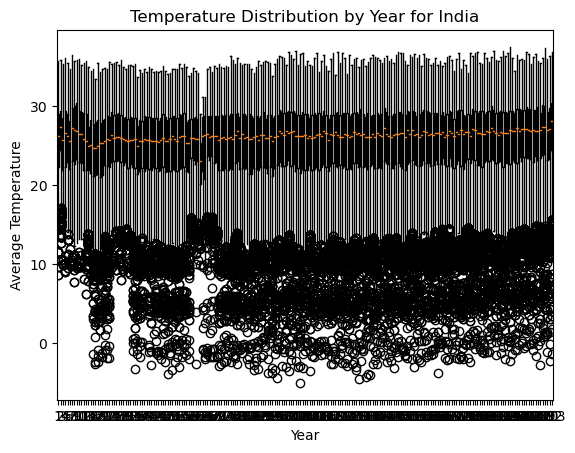

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
cd = data[data['Country'] == 'India'].copy()
cd['dt'] = pd.to_datetime(cd['dt'], errors='coerce')
cd = cd.dropna(subset=['dt'])
cd['year'] = cd['dt'].dt.year
cd = cd[['year', 'AverageTemperature']].dropna()
grouped_data = [group['AverageTemperature'].values for _, group in cd.groupby('year')]
plt.boxplot(grouped_data)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature Distribution by Year for India')
plt.show()
